In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.metrics import confusion_matrix


# Load the Dataset

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


# Length of the Data

print("Length of X Train :",len(x_train))
print("Length of X Test :",len(x_test))
print("Length of Y Train :",len(y_train))
print("Length of Y Test :",len(y_test))


# Shape of the Data

print("\nShape of X Train :",x_train.shape)
print("Shape of X Test :",x_test.shape)
print("Shape of Y Train :",y_train.shape)
print("Shape of Y Test :",y_test.shape)


Length of X Train : 50000
Length of X Test : 10000
Length of Y Train : 50000
Length of Y Test : 10000

Shape of X Train : (50000, 32, 32, 3)
Shape of X Test : (10000, 32, 32, 3)
Shape of Y Train : (50000, 1)
Shape of Y Test : (10000, 1)


In [2]:
# View the Data

print(x_train[0])

print(x_test[1])



# Scale the Data (Ranges between 0 to 255)

x_train = x_train / 255
x_test = x_test / 255


[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
[[[235 235 235]
  [231 231 231]
  [232 232 232]
  ...
  [233 233 233]
  [233 233 233]
  [232 232 232]]

 [[238 238 238]
  [235 235 235]
  [235 235 235]
  ...
  [236 236 236]
  [236 236 236]
  [235 235 235]]

 [[237 237 237]
  [234 234 234]
  [234 234 234]
  ...
  [235 235 235]
  [235 235 235]
  [234 234 234]]

 ...

 [[ 87  99  89]
  [ 43  51  37]
  [ 19  23  11]
  ..

In [3]:
# Convert Text to Numbers using One Hot Encoding in the Dataset

y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)


In [4]:
# Create a Nueral Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])



# Compile

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


# Train

model.fit(x_train, y_train, epochs=50)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2727 - loss: 2.2485
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3911 - loss: 1.6975
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4312 - loss: 1.6032
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4459 - loss: 1.5459
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4631 - loss: 1.5037
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4752 - loss: 1.4652
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4847 - loss: 1.4346
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4951 - loss: 1.4090
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4990 - loss: 1.4028
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5096 - loss: 1.3698
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5187 - loss: 1.3417
Epoch 12/50
1563/1563 ━━

In [5]:
# Prediction

y_pred = model.predict(x_test)


# Evaluate

Evaluate = model.evaluate(x_test, y_test)
print("Model Evaluation :", Evaluate)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4792 - loss: 1.8816
Model Evaluation : [1.849597692489624, 0.483599990606308]


Actual : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

Predicted : 6




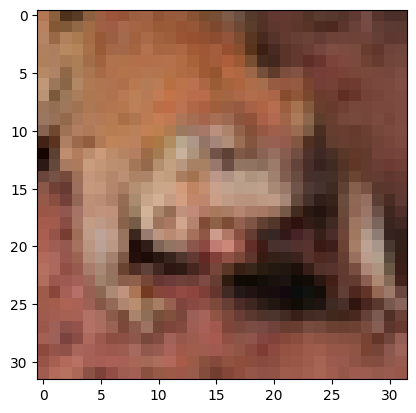

In [6]:
# To Check

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

print("Actual :",y_test[5])

print("\nPredicted :",np.argmax(y_pred[5]))

print("\n")

plt.imshow(x_test[5])
plt.show()


## GPU Bench Mark

This command shows list of physical devices available for tensorflow. You can see GPU listed here. If you have NVIDIA GPU you need to install CUDA toolkit and cuDNN as per instruction on this webpage. Without proper installation you will not see GPU in list of devices

https://shawnhymel.com/1961/how-to-install-tensorflow-with-gpu-support-on-windows/

In [7]:
# List of physical devices available for tensorflow

tf.config.experimental.list_physical_devices()


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [8]:
# Let's make a Function

def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [9]:
# Measure training time on a CPU

%%timeit -n1 -r1

with tf.device('/CPU:0'):
  cpu_model = get_model()
  cpu_model.fit(x_train, y_train, epochs=10)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.3012 - loss: 1.9328
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 74ms/step - accuracy: 0.4218 - loss: 1.6434
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 74ms/step - accuracy: 0.4456 - loss: 1.5582
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 74ms/step - accuracy: 0.4742 - loss: 1.4874
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 73ms/step - accuracy: 0.4922 - loss: 1.4382
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 76ms/step - accuracy: 0.5120 - loss: 1.3941
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 75ms/step - accuracy: 0.5225 - loss: 1.3594
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 117s 75ms/step - accuracy: 0.5350 - loss: 1.3233
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 116s 74ms/step - accuracy: 0.5494 - loss: 1.2836
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 74ms/step - accuracy: 0.5601 - loss: 1.2494
22min 26s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [10]:
# Lets measure training time on a GPU

%%timeit -n1 -r1

with tf.device('/GPU:0'):
  cpu_model = get_model()
  cpu_model.fit(x_train, y_train, epochs=10)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3035 - loss: 1.9340
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4204 - loss: 1.6450
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4524 - loss: 1.5522
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4775 - loss: 1.4841
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4971 - loss: 1.4350
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5124 - loss: 1.3915
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5224 - loss: 1.3516
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5394 - loss: 1.3129
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5478 - loss: 1.2878
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5616 - loss: 1.2591
1min 16s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


You can see that GPU is almost 20 times faster. We ran only 10 epoch for benchmarking but for actual training we have to run many epochs and also when data volume is big running deep learning without GPU can consume so much time. This is the reason why GPUs are becoming popular in the field of deep learning.